# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bunga Harumalia Mardikawati
- **Email:** harumaliabunga178@students.unnes.ac.id
- **ID Dicoding:** [bungaharumalia]

## Menentukan Pertanyaan Bisnis





- Bagaimana kondisi cuaca seperti suhu memengaruhi jumlah peminjaman sepeda?
- Apakah terdapat perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur?
- Bagaimana rata - rata peminjaman sepeda berdasarkan bulan?
- Bagaimana perbandingan pengguna registered dan casual dalam melakukan peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [38]:
# Memanggil library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
# Memuat dataset day.csv
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
# Memuat dataset hour.csv
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua dataset yaitu day.csv dan hour.csv memiliki struktur data atau kolom yang konsisten dan hampir sama, perbedaannya hanya terdapat pada waktu.
- Adanya informasi terkait cuaca dapat digunakan untuk menganalisis bagaimana faktor cuaca dapat mempengaruhi penyewaan sepeda.
- Perbedaan pada kolom "holiday" dan "working day" dapat digunakan untuk mencari perbandingan penyewaan sepeda di hari libur dan hari kerja.
- Kolom season memberikan informasi terkait penyewaan sepeda apakah berubah sesuai dengan musim dan tahun.

### Assessing Data

In [41]:
# Mengecek informasi pada dataset day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
# Mengecek missing value pada dataset day.csv
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [43]:
# Mengecek jumlah duplikasi pada dataset day.csv
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [44]:
# Mengecek inaccurate data pada dataset day.csv
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [45]:
# Mengecek informasi pada dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [46]:
# Mengecek missing value pada dataset hour.csv
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [47]:
# Mengecek duplikasi data pada dataset hour.csv
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [48]:
# Mengecek inaccurate data pada dataset hour.csv
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan dataset day.csv dan hour.csv terdapat satu tipe data pada kolom "dteday" yang bertipe data objek dan memungkinkan untuk mengganti tipe data tersebut menjadi datetime.
- Tidak ada nilai yang hilang dan tidak ada duplikasi pada kedua dataset.
- Berdasarkan ringkasan statistik tidak ada innacurate data yang terjadi pada kedua dataset.

### Cleaning Data

In [49]:
# Mengubah tipe data datetime pada dataset day.csv
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [50]:
# Menampilkan info setelah dilakukan pengubahan tipe data datetime pada dataset day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# Mengubah tipe data datetime pada dataset hour.csv
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [51]:
# Menampilkan info setelah dilakukan pengubahan tipe data datetime pada dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tipe data untuk kolom dteday sudah diubah menjadi datetime pada kedua dataset day.csv dan hour.csv

## Exploratory Data Analysis (EDA)

### Dataset day.csv

In [52]:
# Deskripsi Umum Dataset
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [53]:
# Pengelompokan data berdasarkan cuaca
weather_conditions_day = day_df.groupby("weathersit").agg({
    "temp": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})
weather_conditions_day

temp                             cnt           
                mean      min       max         mean  min   max
weathersit                                                     
1           0.511541  0.05913  0.861667  4876.786177  431  8714
2           0.470366  0.10750  0.815000  4035.862348  605  8362
3           0.433440  0.21750  0.633913  1803.285714   22  4639

In [54]:
# Hubungan antara variabel cuaca dengan jumlah peminjaman sepeda
correlation_temp_day = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara suhu dan jumlah peminjaman sepeda (day.csv): {correlation_temp_day:.2f}")

Korelasi antara suhu dan jumlah peminjaman sepeda (day.csv): 0.63


In [55]:
# Pengelompokan berdasarkan hari kerja dan hari libur
holiday_workday_stats_day = day_df.groupby(by="workingday").agg({
    "cnt": ["mean", "min", "max", "std"]
})
holiday_workday_stats_day

cnt                        
                   mean  min   max          std
workingday                                     
0           4330.168831  605  8714  2052.141245
1           4584.820000   22  8362  1878.415583

In [56]:
# Menghitung jumlah rata rata peminjaman sepeda per bulan
monthly_rentals_day = day_df.groupby('mnth')['cnt'].mean().reset_index()
monthly_rentals_day

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5664.419355
8,9,5766.516667
9,10,5199.225806


In [57]:
# Mengetahui statistik kolom registered dan casual pada day.csv
print(day_df[['registered', 'casual']].describe())

        registered       casual
count   731.000000   731.000000
mean   3656.172367   848.176471
std    1560.256377   686.622488
min      20.000000     2.000000
25%    2497.000000   315.500000
50%    3662.000000   713.000000
75%    4776.500000  1096.000000
max    6946.000000  3410.000000


In [58]:
# Menghitung total peminjaman sepeda berdasarkan registered dan casual
total_registered_day = day_df['registered'].sum()
total_casual_day = day_df['casual'].sum()

# Menghitung total peminjaman sepeda keseluruhan
total_loans = total_registered_day + total_casual_day

# Menghitung total peminjaman sepeda berdasarkan registered dan casul
persen_registered = (total_registered_day / total_loans) * 100
persen_casual = (total_casual_day / total_loans) * 100

print(f"Total peminjaman sepeda oleh pengguna registered (day.csv): {total_registered_day}")
print(f"Total peminjaman sepeda oleh pengguna casual (day.csv): {total_casual_day}")
print(f"Persentase peminjaman sepeda oleh pengguna registered: {persen_registered:.2f}%")
print(f"Persentase peminjaman sepeda oleh pengguna casual: {persen_casual:.2f}%")

Total peminjaman sepeda oleh pengguna registered (day.csv): 2672662
Total peminjaman sepeda oleh pengguna casual (day.csv): 620017
Persentase peminjaman sepeda oleh pengguna registered: 81.17%
Persentase peminjaman sepeda oleh pengguna casual: 18.83%


### Dataset hour.csv

In [59]:
# Deskripsi Umum Dataset
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [60]:
# Pengelompokan data berdasarkan cuaca
weather_conditions_hour = hour_df.groupby("weathersit").agg({
    "temp": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})
weather_conditions_hour

temp                     cnt         
                mean   min   max        mean min  max
weathersit                                           
1           0.511054  0.02  1.00  204.869272   1  977
2           0.474445  0.02  0.96  175.165493   1  957
3           0.456688  0.08  0.92  111.579281   1  891
4           0.186667  0.14  0.22   74.333333  23  164

In [61]:
# Hubungan antara variabel cuaca dengan jumlah peminjaman sepeda
correlation_temp_hour = hour_df['temp'].corr(hour_df['cnt'])
print(f"Korelasi antara suhu dan jumlah peminjaman sepeda (hour.csv): {correlation_temp_hour:.2f}")

Korelasi antara suhu dan jumlah peminjaman sepeda (hour.csv): 0.40


In [62]:
# Pengelompokan berdasarkan hari kerja dan hari libur
holiday_workday_stats_hour = hour_df.groupby(by="workingday").agg({
    "cnt": ["mean", "min", "max", "std"]
})
holiday_workday_stats_hour

cnt                     
                  mean min  max         std
workingday                                 
0           181.405332   1  783  172.853832
1           193.207754   1  977  185.107477

In [63]:
# Menghitung jumlah rata rata peminjaman sepeda per bulan
monthly_rentals_hour = hour_df.groupby('mnth')['cnt'].mean().reset_index()
monthly_rentals_hour

,mnth,cnt
0,1,94.424773
1,2,112.865026
2,3,155.410726
3,4,187.260960
4,5,222.907258
5,6,240.515278
6,7,231.819892
7,8,238.097627
8,9,240.773138
9,10,222.158511


In [64]:
# Mengetahui statistik kolom registered dan casual
print(hour_df[['registered', 'casual']].describe())

         registered        casual
count  17379.000000  17379.000000
mean     153.786869     35.676218
std      151.357286     49.305030
min        0.000000      0.000000
25%       34.000000      4.000000
50%      115.000000     17.000000
75%      220.000000     48.000000
max      886.000000    367.000000


In [65]:
# Menghitung total peminjaman sepeda berdasarkan registered dan casual
total_registered_hour = hour_df['registered'].sum()
total_casual_hour = hour_df['casual'].sum()

# Menghitung total peminjaman sepeda keseluruhan
total_loans = total_registered_hour + total_casual_hour

# Menghitung total peminjaman sepeda berdasarkan registered dan casul
persen_registered = (total_registered_hour / total_loans) * 100
persen_casual = (total_casual_hour / total_loans) * 100

print(f"Total peminjaman sepeda oleh pengguna registered (hour.csv): {total_registered_hour}")
print(f"Total peminjaman sepeda oleh pengguna casual (hour.csv): {total_casual_hour}")
print(f"Persentase peminjaman sepeda oleh pengguna registered: {persen_registered:.2f}%")
print(f"Persentase peminjaman sepeda oleh pengguna casual: {persen_casual:.2f}%")

Total peminjaman sepeda oleh pengguna registered (hour.csv): 2672662
Total peminjaman sepeda oleh pengguna casual (hour.csv): 620017
Persentase peminjaman sepeda oleh pengguna registered: 81.17%
Persentase peminjaman sepeda oleh pengguna casual: 18.83%


**Insight:**
- Kondisi cuaca seperti suhu memiliki pengaruh terhadap peminjaman sepeda. Peminjaman sepeda meningkat ketika suhu tinggi (kategori 1) dan menurun ketika suhu rendah (kategori 3). Adanya korelasi positif antara suhu dan peminjaman sepeda, dimana korelasi tersebut berada pada angka 0.63 pada datset day.csv dan 0.40 pada dataset hour.csv.
- Terjadinya peningkatan peminjaman sepeda pada hari kerja daripada hari libur.
- Peminjaman sepeda bulanan memiliki variasi salah satunya di karenakan kondisi musim yang berubah.
- Pengguna registered mendominasi dalam peminjaman sepeda dan terbilang konsisten daripada pengguna casual. Sebanyak 2.67 juta pengguna registered dan 620 ribu pengguna casual.

## Visualization & Explanatory Analysis



### Pertanyaan 1: Bagaimana kondisi cuaca seperti suhu memengaruhi jumlah peminjaman sepeda?

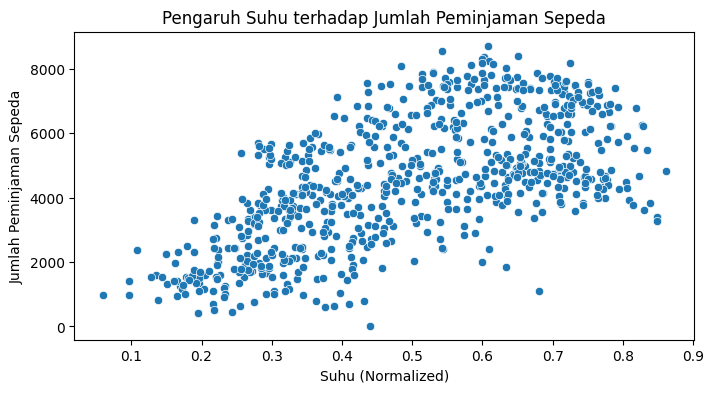

In [66]:
# Membuat scatter plot untuk mengetahui variabel suhu memengaruhi jumlah peminjaman sepeda
plt.figure(figsize=(8, 4))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Berdasarkan analisis menggunakan scatter plot terdapat adanya korelasi antara suhu dan jumlah peminjaman sepeda yang ditunjukkan dengan pola positif. Saat suhu meningkat maka rata - rata jumlah peminjaman sepeda ikut meningkat, biasanya terjadi ketika suhu memiliki rentang 0.4 hingga 0.7.

### Pertanyaan 2: Apakah terdapat perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur?

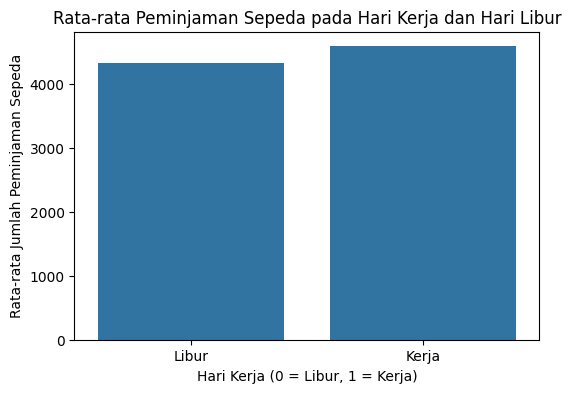

In [67]:
# Membuat bar plot untuk mengetahui perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur
plt.figure(figsize=(6, 4))
sns.barplot(x="workingday", y="cnt", data=day_df, estimator="mean", errorbar=None)
plt.title("Rata-rata Peminjaman Sepeda pada Hari Kerja dan Hari Libur")
plt.xlabel("Hari Kerja (0 = Libur, 1 = Kerja)")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.xticks([0, 1], ['Libur', 'Kerja'])
plt.show()

**Insight:**
- Berdasarkan visualisasi, terdapat perbedaan peminjaman sepeda yang tidak terlalu signifikan di hari kerja dimana cenderung sedikit lebih tinggi di banding ketika hari libur. Hal tersebut dapat terjadi karena di hari kerja banyak orang yang membutuhkan sepeda untuk beraktivitas.

### Pertanyaan 3: Bagaimana rata - rata peminjaman sepeda berdasarkan bulan?

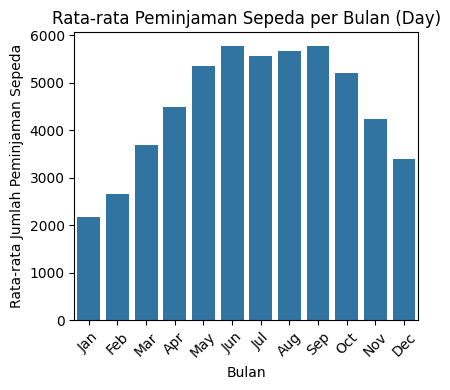

In [68]:
# Membuat bar plot untuk mengetahui rata - rata peminjaman sepeda berdasarkan bulan
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='mnth', y='cnt', data=monthly_rentals_day)
plt.title('Rata-rata Peminjaman Sepeda per Bulan (Day)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show();

**Insight:**
- Berdasarkan bar chart, peminjaman sepeda terjadi peningkatan secara signifikan terutama pada bulan Juni - September sekitar 5000 orang lebih dan  terjadi penurunan paling rendah hingga di bulan Desember.

### Pertanyaan 4: Bagaimana perbandingan pengguna registered dan casual dalam melakukan peminjaman sepeda?

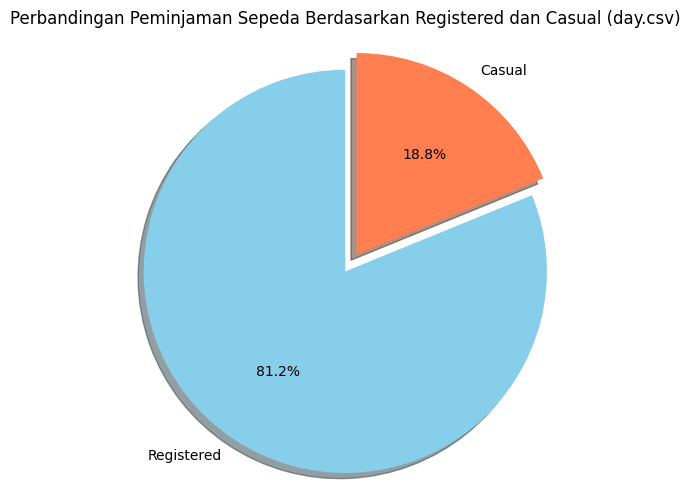

In [69]:
# Membuat visualisasi pie chart
labels = ['Registered', 'Casual']
sizes = [total_registered_day, total_casual_day]
colors = ['skyblue', 'coral']
explode = (0.1, 0)

# Membuat pie chart berdasarkan data day.csv
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Perbandingan Peminjaman Sepeda Berdasarkan Registered dan Casual (day.csv)')
plt.axis('equal')
plt.show()

**Insight:**
- Perbandingan pengguna registered dalam melakukan peminjaman sepeda lebih banyak yaitu sebesar 81.2% daripada pengguna casual yang hanya sebesar 18.8%.

## Analisis Lanjutan (Opsional)

### Pertanyaan 5 : Bagaimana Tren Peminjaman Sepeda Berdasarkan Jam?

In [70]:
# Membuat kategori berdasarkan jam
hour_df['time_category'] = pd.cut(hour_df['hr'],
                                   bins=[-1, 6, 10, 16, 20, 24],
                                   labels=['Night (Late)', 'Morning Rush', 'Midday', 'Evening Rush', 'Night (Early)'])

# Menghitung rata-rata peminjaman sepeda pada setiap kategori waktu
time_clustering = hour_df.groupby('time_category', observed=False)['cnt'].mean().reset_index()

# Menampilkan hasil rata-rata peminjaman sepeda berdasarkan kategori waktu
print("Rata-rata peminjaman sepeda berdasarkan kategori waktu:")
time_clustering

Rata-rata peminjaman sepeda berdasarkan kategori waktu:


,time_category,cnt
0,Night (Late),32.321736
1,Morning Rush,241.013411
2,Midday,253.248399
3,Evening Rush,356.201441
4,Night (Early),130.493590


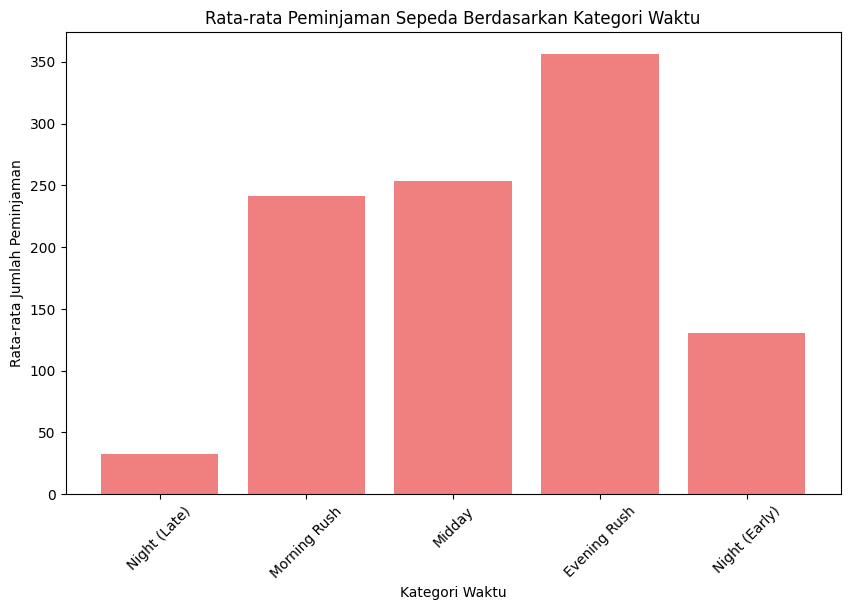

In [71]:
# Membuat bar plot untuk mengetahuii rata rata peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.bar(time_clustering['time_category'], time_clustering['cnt'], color='lightcoral')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kategori Waktu')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Jumlah peminjaman sepeda paling tinggi terjadi di sore hari (Evening Rush) sekitar pukul 16.00 - 20.00 dengan jumlah peminjam diatas 350 orang.

## Conclusion

Kesimpulan Pertanyaan 1 : Bagaimana kondisi cuaca seperti suhu memengaruhi jumlah peminjaman sepeda?
- Berdasarkan hasil analisis, suhu memiliki pengaruh terhadap peminjaman sepeda yang menunjukkan adanya korelasi positif. Saat suhu tinggi (hangat) memungkinkan orang untuk melakukan aktivitas diluar rumah sehingga peminjaman sepeda banyak dilakukan.
- Puncak peminjaman sepeda paling banyak terjadi saat suhu berada di rentang 0.4 hingga 0.8 yaitu hampir mencapai 8000 peminjam.

Kesimpulan Pertanyaan 2 : Apakah terdapat perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur?
- Berdasarkan hasil analisis, terdapat perbedaan yang tidak telalu signifikan terhadap peminjaman sepeda pada hari libur dan hari kerja. Peminjaman sepeda di hari kerja lebih banyak dilakukan dengan lebih dari 4000 peminjam sepeda.

Kesimpulan Pertanyaan 3 : Bagaimana rata - rata peminjaman sepeda berdasarkan bulan?
- Berdasarkan hasil analisis, terjadi peningkatan yang cukup drastis terkait peminjaman sepeda setiap bulan. Peminjaman tertinggi terjadi pada bulan Juni hingga bulan September dengan rata - rata peminjam hampir mendekati 6000 orang.
- Adanya penurunan setelah bulan September yang dapat disebabkan oleh pergantian musim hingga peminjaman paling rendah terjadi di bulan Desember.

Kesimpulan Pertanyaan 4 : Bagaimana perbandingan pengguna registered dan casual dalam melakukan peminjaman sepeda?
- Berdasarkan hasil analisis, pengguna yang terdaftar (registered) melakukan peminjaman sepeda paling banyak dibanding pengguna casual. Pengguna register mendominasi dengan total presentase mencapai 81.2 % dan pengguna casual sebesar 18.8 %.

Kesimpulan Analisis Lanjutan : Bagaimana Tren Peminjaman Sepeda Berdasarkan Jam?
- Berdasarkan hasil analisis, peminjaman sepeda banyak dilakukan pada sore hari (Evening Rush) dengan jumlah peminjam hampir mencapai 350.  Kemudian diikuti pada Midday, Morning Rush, Early Night, dan terakhir Late Night.